<a href="https://colab.research.google.com/github/abebe800/APHI-Project/blob/main/Abebe_Assaye_24_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1,castumize goggle colab

step1:import all necessery liberaris

In [ ]:

# Import necessary libraries for the entire project
# Sub-step: Import torch for deep learning framework
import torch
# Sub-step: Import nn for neural network modules
import torch.nn as nn
# Sub-step: Import optim for optimizers
import torch.optim as optim
# Sub-step: Import functional for activation functions and other utilities
import torch.nn.functional as F
# Sub-step: Import DataLoader for batching data
from torch.utils.data import DataLoader, Dataset, ConcatDataset
# Sub-step: Import torchvision for datasets and models
import torchvision
# Sub-step: Import transforms for data preprocessing and augmentation
import torchvision.transforms as transforms
# Sub-step: Import models for pre-trained architectures
from torchvision import models
# Sub-step: Import datasets.ImageFolder for custom image datasets
from torchvision.datasets import ImageFolder
# Sub-step: Import numpy for numerical operations
import numpy as np
# Sub-step: Import matplotlib for plotting
import matplotlib.pyplot as plt
# Sub-step: Import pandas for data analysis
import pandas as pd
# Sub-step: Import os for file operations
import os
# Sub-step: Import random for random operations
import random
# Sub-step: Import copy for deep copying objects
import copy
# Sub-step: Import zipfile for handling zip archives
import zipfile
# Sub-step: Import PIL for image operations
from PIL import Image
# Note: For confusion matrix, we'll implement manually
# Note: For GradCAM, we'll implement custom class
# Note: For deployment, we'll use Gradio; assume user runs !pip install gradio if needed

step2:mount the data to the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


step3:import zipfile


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/best_cancer_model.pth"
extract_path = "/content/drive/MyDrive/cancer_extracted"  # output folder

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Files extracted to:", extract_path)
except FileNotFoundError:
    print(f"Error: Zip file not found at {zip_path}")
except Exception as e:
    print(f"An error occurred during extraction: {e}")

Files extracted to: /content/drive/MyDrive/cancer_extracted


step4:To show the content folder of the data

In [ ]:
import os

base_path = "/content/drive/MyDrive/cancer_extracted"

for root, dirs, files in os.walk(base_path):
    print("📂 Folder:", root, " | Files:", len(files), " | Subfolders:", dirs)

Train dataset: 2637 images (Benign: 1440, Malignant: 1197)
Test dataset: 660 images (Benign: 360, Malignant: 300)
📂 Folder: /content/drive/MyDrive/cancer_extracted  | Files: 0  | Subfolders: ['data', 'test', 'train', 'best_cancer_model']
📂 Folder: /content/drive/MyDrive/cancer_extracted/data  | Files: 0  | Subfolders: ['test', 'train']
📂 Folder: /content/drive/MyDrive/cancer_extracted/data/test  | Files: 0  | Subfolders: ['benign', 'malignant']
📂 Folder: /content/drive/MyDrive/cancer_extracted/data/test/benign  | Files: 360  | Subfolders: []
📂 Folder: /content/drive/MyDrive/cancer_extracted/data/test/malignant  | Files: 300  | Subfolders: []
📂 Folder: /content/drive/MyDrive/cancer_extracted/data/train  | Files: 0  | Subfolders: ['benign', 'malignant']
📂 Folder: /content/drive/MyDrive/cancer_extracted/data/train/benign  | Files: 1440  | Subfolders: []
📂 Folder: /content/drive/MyDrive/cancer_extracted/data/train/malignant  | Files: 1197  | Subfolders: []
📂 Folder: /content/drive/MyDrive/

In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/best_cancer_model.pth"
extract_path = "/content/drive/MyDrive/cancer_extracted"  # output folder

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Files extracted to:", extract_path)
except FileNotFoundError:
    print(f"Error: Zip file not found at {zip_path}")
except Exception as e:
    print(f"An error occurred during extraction: {e}")

Files extracted to: /content/drive/MyDrive/cancer_extracted


2,The body of the project

# Step 1: Data Loading

In [ ]:
# Step 1: Data Loading
# Sub-step: Define paths to the dataset directories
train_data_root = '/content/drive/MyDrive/cancer_extracted/data/train'
test_data_root = '/content/drive/MyDrive/cancer_extracted/data/test'

# Add a check to see if the directories exist
if not os.path.exists(train_data_root):
    print(f"Error: Training data directory not found at {train_data_root}")
    # Attempt to list contents of the parent directory for debugging
    parent_dir = os.path.dirname(train_data_root)
    if os.path.exists(parent_dir):
        print(f"Contents of {parent_dir}: {os.listdir(parent_dir)}")
    else:
        print(f"Parent directory {parent_dir} not found either.")

if not os.path.exists(test_data_root):
    print(f"Error: Test data directory not found at {test_data_root}")
    parent_dir = os.path.dirname(test_data_root)
    if os.path.exists(parent_dir):
        print(f"Contents of {parent_dir}: {os.listdir(parent_dir)}")
    else:
        print(f"Parent directory {parent_dir} not found either.")


transform_load = transforms.Compose([transforms.ToTensor()])

# Sub-step: Load train and test datasets using ImageFolder
train_dataset = ImageFolder(root=train_data_root, transform=transform_load)
test_dataset = ImageFolder(root=test_data_root, transform=transform_load)

# Sub-step: Concatenate the datasets
dataset = ConcatDataset([train_dataset, test_dataset])

# Sub-step: Get class labels (0: benign, 1: malignant)
# We can get class names from either train_dataset or test_dataset
classes = train_dataset.classes

# Step 2: Data Preprocessing augmention

In [ ]:
# Step 2: Data Preprocessing and Augmentation
# Sub-step: Define transformations for the training set (with augmentation)
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),          # Resize to a fixed size
    transforms.RandomHorizontalFlip(),      # Random horizontal flip for augmentation
    transforms.RandomVerticalFlip(),        # Random vertical flip for augmentation
    transforms.RandomRotation(15),          # Random rotation for augmentation
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1), # Added Color Jitter
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10), # Added Random Affine
    transforms.ToTensor(),                  # Convert images to PyTorch tensors
    # Normalization will be added after calculating mean and std
])

# Sub-step: Define transformations for the validation/test set (without augmentation)
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),          # Resize to a fixed size
    transforms.ToTensor(),                  # Convert images to PyTorch tensors
    # Normalization will be added after calculating mean and std
])

print("Data preprocessing and augmentation transformations defined.")

step3:data cleaning

In [ ]:
# Step3: Data Cleaning
problematic_images = []
print("Scanning dataset for problematic images...")

# Add a progress bar
from tqdm.notebook import tqdm

for i in tqdm(range(len(dataset))):
    try:
        # Get the image path and label
        # Need to handle both original ImageFolder datasets within the ConcatDataset
        if i < len(dataset.datasets[0]):
            img_path, label = dataset.datasets[0].imgs[i]
        else:
            img_path, label = dataset.datasets[1].imgs[i - len(dataset.datasets[0])]

        # Attempt to open and load the image to catch issues early
        with Image.open(img_path) as img:
            img.load()
    except (IOError, SyntaxError, Exception) as e:
        problematic_images.append(img_path)
        # Optionally print the error for problematic images, but this can slow down the output for many errors
        # print(f"Problematic image found: {img_path} - Error: {e}")

print("\nScan complete.")
print(f"Total problematic images found: {len(problematic_images)}")

# Optional: Print the list of problematic images
# if problematic_images:
#     print("List of problematic images:")
#     for img_path in problematic_images:
#         print(img_path)

Scanning dataset for problematic images...


  0%|          | 0/3297 [00:00<?, ?it/s]


Scan complete.
Total problematic images found: 0


In [ ]:
# Print the total number of images in the dataset
print(f"Total number of images in the dataset: {len(dataset)}")

# Print the number of classes
print(f"Number of classes: {len(classes)}")
print(f"Classes: {classes}")

Total number of images in the dataset: 3297
Number of classes: 2
Classes: ['benign', 'malignant']


# Step4: Explanatory Data Analysis

Total number of images in the dataset: 3297
Number of images in train_dataset (from /content/drive/MyDrive/cancer_extracted/data/train): 2637
Number of images in test_dataset (from /content/drive/MyDrive/cancer_extracted/data/test): 660
Displaying sample images from the dataset:


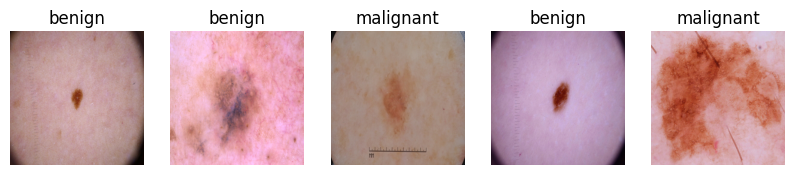


Displaying an example of an augmented image:


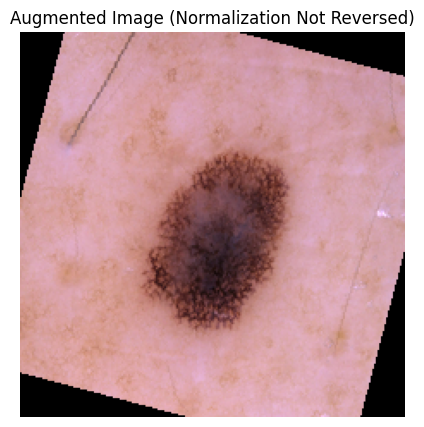


Displaying class distribution:


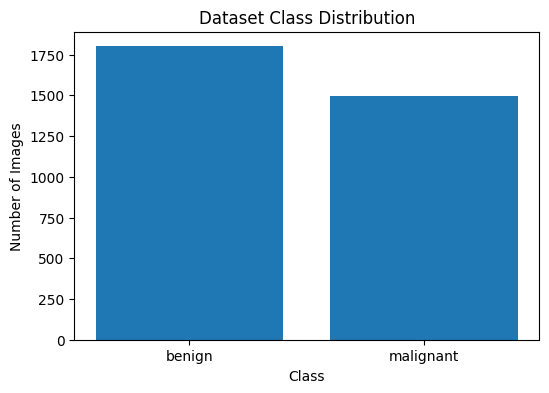


Class counts:
benign: 1800
malignant: 1497


In [ ]:
# Step: Explanatory Data Analysis (EDA)
# Sub-step: Display the total number of images in the dataset
print(f"Total number of images in the dataset: {len(dataset)}")
# Print the breakdown of images from train and test sets in the combined dataset
print(f"Number of images in train_dataset (from {train_data_root}): {len(train_dataset)}")
print(f"Number of images in test_dataset (from {test_data_root}): {len(test_dataset)}")


# Sub-step: Display a few sample images from the dataset
print("Displaying sample images from the dataset:")
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # Get a random index
    idx = random.randint(0, len(dataset) - 1)
    img, label = dataset[idx]
    # Convert tensor to numpy for displaying
    plt.imshow(img.permute(1, 2, 0))
    plt.title(classes[label])
    plt.axis('off')
plt.show()

# Sub-step: Display an example of an augmented image
print("\nDisplaying an example of an augmented image:")
# Get a sample image (e.g., the first image from the training dataset)
# Ensure train_dataset is defined and has transformations applied
if 'train_dataset' in locals() and len(train_dataset) > 0:
    sample_img, sample_label = train_dataset[0]
    # The transformation includes ToTensor and Normalize, so we need to reverse normalization for display
    # We need the mean and std used for normalization. Assuming they are stored in train_mean and train_std
    # If not, this part might need adjustment based on where mean/std are calculated and stored.
    # For demonstration purposes, let's assume we can apply the transform_train directly to a raw image
    # This requires getting a raw image before ToTensor and Normalize
    try:
        # Get a raw image path and open it
        raw_img_path, _ = dataset.datasets[0].imgs[0] # Get path from the original ImageFolder
        raw_img = Image.open(raw_img_path).convert('RGB') # Open and convert to RGB

        # Apply the training transformations to the raw image
        augmented_img_tensor = transform_train(raw_img)

        # Reverse normalization for display: img = img * std + mean
        # Need to ensure train_mean and train_std are available in this scope
        # Assuming train_mean and train_std were calculated and are accessible
        if 'train_mean' in locals() and 'train_std' in locals():
             # Clone the tensor to avoid in-place modification of the original augmented_img_tensor
            img_display = augmented_img_tensor.clone()
            for t, m, s in zip(img_display, train_mean, train_std):
                t.mul_(s).add_(m)

            # Clamp values to be in [0, 1] range after reversing normalization
            img_display = torch.clamp(img_display, 0, 1)

            plt.figure(figsize=(5, 5))
            plt.imshow(img_display.permute(1, 2, 0))
            plt.title(f"Augmented Image (Original Label: {classes[sample_label]})")
            plt.axis('off')
            plt.show()
        else:
            print("Warning: train_mean and train_std not found. Cannot display augmented image with reversed normalization.")
            # Display without reversing normalization (might look strange)
            plt.figure(figsize=(5, 5))
            plt.imshow(augmented_img_tensor.permute(1, 2, 0)) # This will likely look wrong due to normalization
            plt.title("Augmented Image (Normalization Not Reversed)")
            plt.axis('off')
            plt.show()


    except Exception as e:
        print(f"Could not display augmented image: {e}")

else:
    print("Training dataset not found or is empty. Cannot display augmented image example.")

# Sub-step: Display class distribution
print("\nDisplaying class distribution:")
class_counts = {}
for _, label in dataset:
    class_name = classes[label]
    class_counts[class_name] = class_counts.get(class_name, 0) + 1

plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Dataset Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

# Sub-step: Explicitly print class counts
print("\nClass counts:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Step5: Handle Class Imbalance

In [ ]:
# Step: Handle Class Imbalance with Weighted Loss
# Sub-step: Calculate class weights
# Get the counts of each class from the dataset
class_counts = {}
for _, label in dataset:
    class_name = classes[label]
    class_counts[class_name] = class_counts.get(class_name, 0) + 1

total_samples = len(dataset)
# Calculate weights: inverse of class frequency
# weight = total_samples / (number of classes * class_count)
# A simpler and often effective approach is using the inverse of class frequency
# weight = total_samples / class_count
# Or even simpler: 1. / class_count, normalized
class_weights = [total_samples / class_counts[cls_name] for cls_name in classes]
# Normalize weights so they sum to the number of classes (optional but can help)
# norm_factor = sum(class_weights) / len(classes)
# class_weights = [weight / norm_factor for weight in class_weights]

# Convert to a PyTorch tensor
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

print("Calculated Class Weights:")
for i, class_name in enumerate(classes):
    print(f"{class_name}: {class_weights_tensor[i].item():.4f}")

# Sub-step: Define a weighted loss function (e.g., Cross-Entropy Loss)
# Use the calculated weights when defining the loss function
# Make sure to move weights to the appropriate device (CPU or GPU) during training
# For now, just define it on CPU
weighted_criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

print("\nWeighted Cross-Entropy Loss function defined.")
print("This loss function will give more weight to the minority class during training.")

# Note: You would use 'weighted_criterion' instead of a standard criterion
# when defining your training loop later.

Calculated Class Weights:
benign: 1.8317
malignant: 2.2024

Weighted Cross-Entropy Loss function defined.
This loss function will give more weight to the minority class during training.


# Step6: Split Dataset into Training, Validation, and Test Sets

In [ ]:
# Step6: Split Dataset into Training, Validation, and Test Sets
# Sub-step: Import random_split
from torch.utils.data import random_split

# Sub-step: Define proportions for the splits
# Let's use 80% for training, 10% for validation, and 10% for testing
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1 # Ensure train_ratio + val_ratio + test_ratio = 1.0

# Calculate the number of samples for each split
total_size = len(dataset)
train_size = int(total_size * train_ratio)
val_size = int(total_size * val_ratio)
test_size = total_size - train_size - val_size # Ensure all samples are included

print(f"Total dataset size: {total_size}")
print(f"Training set size: {train_size}")
print(f"Validation set size: {val_size}")
print(f"Test set size: {test_size}")

# Sub-step: Split the dataset using random_split
train_subset, val_subset, test_subset = random_split(dataset, [train_size, val_size, test_size])

print("\nDataset split into training, validation, and test subsets.")

Total dataset size: 3297
Training set size: 2637
Validation set size: 329
Test set size: 331

Dataset split into training, validation, and test subsets.


# Step7: Create Data Loaders

In [ ]:
# Step: Create Data Loaders
# Sub-step: Define the batch size
batch_size = 32 # Or 64, depending on available memory

# Load train dataset with initial transformations to calculate mean and std
transform_calculate_mean_std = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
train_dataset_initial = ImageFolder(root=train_data_root, transform=transform_calculate_mean_std)

# Calculate mean and std from the initial training dataset
print("Calculating mean and std from training data...")
loader_temp = torch.utils.data.DataLoader(train_dataset_initial, batch_size=32, shuffle=False, num_workers=2)
mean = 0.
std = 0.
nb_samples = 0.
for data, _ in loader_temp:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

train_mean = mean / nb_samples
train_std = std / nb_samples
print(f"Calculated Mean: {train_mean}")
print(f"Calculated Std: {train_std}")


# Define final transformations including normalization
transform_train_final = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=train_mean, std=train_std)
])

transform_test_final = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=train_mean, std=train_std) # Use training mean/std for test set
])

# Re-load train and test datasets with final transformations
train_dataset_final = ImageFolder(root=train_data_root, transform=transform_train_final)
test_dataset_final = ImageFolder(root=test_data_root, transform=transform_test_final)

# Split the train_dataset_final into training and validation sets
# We need to decide how to split the original train_data_root into train and validation.
# Let's use the previous split ratios but apply them to the train_dataset_final.
# This means the 'test_dataset_final' loaded from test_data_root will be our final test set.
# We will split the 'train_dataset_final' (from train_data_root) into training and validation.

train_val_size = len(train_dataset_final)
train_ratio = 0.8 # Define train_ratio here or ensure it's in the scope
val_ratio = 0.1 # Define val_ratio here or ensure it's in the scope
train_size_final = int(train_val_size * (train_ratio / (train_ratio + val_ratio))) # Proportion of original train set for new train set
val_size_final = train_val_size - train_size_final

print(f"\nSplitting original training set ({train_val_size} images) into:")
print(f"  New Training set size: {train_size_final}")
print(f"  Validation set size: {val_size_final}")

from torch.utils.data import random_split
train_subset_final, val_subset_final = random_split(train_dataset_final, [train_size_final, val_size_final])

# The test_dataset_final is already loaded from the test_data_root
test_subset_final = test_dataset_final

print("\nDatasets with final transformations created and split.")


# Now create DataLoaders for the final subsets
train_loader = DataLoader(train_subset_final, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_subset_final, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_subset_final, batch_size=batch_size, shuffle=False, num_workers=2)

print("\nDataLoaders created.")

# Sub-step: Print the number of batches
print(f"\nNumber of batches in training loader: {len(train_loader)}")
print(f"Number of batches in validation loader: {len(val_loader)}")
print(f"Number of batches in test loader: {len(test_loader)}")

Calculating mean and std from training data...
Calculated Mean: tensor([0.7602, 0.5367, 0.5379])
Calculated Std: tensor([0.0951, 0.1191, 0.1330])

Splitting original training set (2637 images) into:
  New Training set size: 2344
  Validation set size: 293

Datasets with final transformations created and split.

DataLoaders created.

Number of batches in training loader: 74
Number of batches in validation loader: 10
Number of batches in test loader: 21


# Step8: Define a Convolutional Neural Network (CNN) model architecture

In [ ]:
# Step: Define a Convolutional Neural Network (CNN) model architecture
# Sub-step: Choose a suitable pre-trained CNN model (e.g., ResNet18)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Sub-step: Modify the final layer for binary classification
# ResNet's classifier is a linear layer at the end
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2) # Output layer with 2 classes (benign, malignant)

# Sub-step: Define the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Sub-step: Move the model to the device
model = model.to(device)

# Sub-step: Print the model structure
print("\nModel architecture after modification:")
print(model)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 186MB/s]


Using device: cuda

Model architecture after modification:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

# Step9: Implement the training loop

In [ ]:
# Step: Implement the training loop
# Sub-step: Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Sub-step: Define the number of training epochs
num_epochs = 25

# Lists to store training and validation metrics per epoch
train_losses = []
val_losses = []
val_accuracies = []

# Initialize variables to track the best model
best_val_loss = float('inf')
best_model_state_dict = None

print("Starting training...")

# Sub-step: Implement the training loop
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    running_train_loss = 0.0

    # Iterate over batches from the training data loader
    for inputs, labels in train_loader:
        # Move input images and labels to the selected device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Perform a forward pass
        outputs = model(inputs)

        # Move the weighted criterion to the same device as the data and model
        weighted_criterion.to(device)

        # Calculate the loss using the weighted loss criterion
        loss = weighted_criterion(outputs, labels)

        # Perform backpropagation
        loss.backward()

        # Update model weights
        optimizer.step()

        # Track and accumulate the training loss
        running_train_loss += loss.item() * inputs.size(0)

    epoch_train_loss = running_train_loss / len(train_subset_final)
    train_losses.append(epoch_train_loss)

    # Sub-step: Implement the validation step
    # Set the model to evaluation mode
    model.eval()
    running_val_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Disable gradient calculation
    with torch.no_grad():
        # Iterate over batches from the validation data loader
        for inputs, labels in val_loader:
            # Move input images and labels to the selected device
            inputs, labels = inputs.to(device), labels.to(device)

            # Perform a forward pass
            outputs = model(inputs)

            # Move the weighted criterion to the same device as the data and model
            weighted_criterion.to(device)

            # Calculate the loss
            loss = weighted_criterion(outputs, labels)

            # Track and accumulate the validation loss
            running_val_loss += loss.item() * inputs.size(0)

            # Calculate predictions
            _, predicted = torch.max(outputs.data, 1)

            # Track and accumulate correct predictions and total samples
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

    epoch_val_loss = running_val_loss / len(val_subset_final)
    epoch_val_accuracy = 100 * correct_predictions / total_samples
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_accuracy)

    # Print training and validation performance
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_accuracy:.2f}%")

    # Keep track of the best model based on validation loss
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        best_model_state_dict = copy.deepcopy(model.state_dict())
        print("--> Best model updated")


print("\nTraining finished.")

# Optional: Load the best model state dictionary back into the model after training
# model.load_state_dict(best_model_state_dict)
# print("Loaded best model state dictionary.")

Starting training...
Epoch 1/25, Train Loss: 0.4512, Val Loss: 0.3451, Val Acc: 85.67%
--> Best model updated
Epoch 2/25, Train Loss: 0.3601, Val Loss: 0.4018, Val Acc: 85.32%
Epoch 3/25, Train Loss: 0.3341, Val Loss: 0.3543, Val Acc: 83.62%
Epoch 4/25, Train Loss: 0.3285, Val Loss: 0.3059, Val Acc: 88.05%
--> Best model updated
Epoch 5/25, Train Loss: 0.3096, Val Loss: 0.3579, Val Acc: 86.01%
Epoch 6/25, Train Loss: 0.2936, Val Loss: 0.3508, Val Acc: 85.32%
Epoch 7/25, Train Loss: 0.3073, Val Loss: 0.3070, Val Acc: 86.01%
Epoch 8/25, Train Loss: 0.3027, Val Loss: 0.3146, Val Acc: 86.01%
Epoch 9/25, Train Loss: 0.2840, Val Loss: 0.2891, Val Acc: 86.01%
--> Best model updated
Epoch 10/25, Train Loss: 0.2695, Val Loss: 0.2713, Val Acc: 88.05%
--> Best model updated
Epoch 11/25, Train Loss: 0.2934, Val Loss: 0.2849, Val Acc: 88.05%
Epoch 12/25, Train Loss: 0.2656, Val Loss: 0.2902, Val Acc: 86.69%
Epoch 13/25, Train Loss: 0.2573, Val Loss: 0.3071, Val Acc: 88.74%
Epoch 14/25, Train Loss: 

# Step10: Model Evaluation

Starting model evaluation on the test set...

Model Evaluation Metrics:
Test Accuracy: 86.52%
Test Precision (weighted): 0.8736
Test Recall (weighted): 0.8652
Test F1-score (weighted): 0.8654


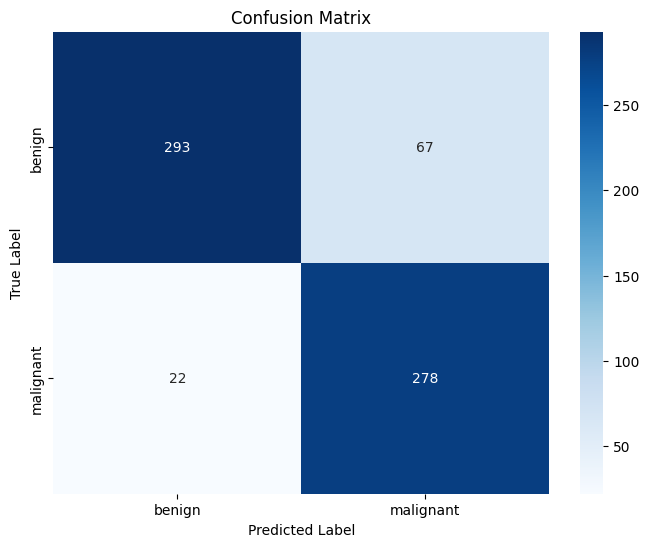


Classification Report:
              precision    recall  f1-score   support

      benign       0.93      0.81      0.87       360
   malignant       0.81      0.93      0.86       300

    accuracy                           0.87       660
   macro avg       0.87      0.87      0.87       660
weighted avg       0.87      0.87      0.87       660


Model evaluation finished.


In [ ]:
# Step: Model Evaluation
# Sub-step: Set the model to evaluation mode
model.eval()

# Sub-step: Initialize variables for evaluation metrics
correct_predictions = 0
total_samples = 0
all_labels = []
all_predicted = []

print("Starting model evaluation on the test set...")

# Sub-step: Disable gradient calculation
with torch.no_grad():
    # Iterate over batches from the test data loader
    for inputs, labels in test_loader:
        # Move input images and labels to the selected device
        inputs, labels = inputs.to(device), labels.to(device)

        # Perform a forward pass
        outputs = model(inputs)

        # Get predictions
        _, predicted = torch.max(outputs.data, 1)

        # Accumulate correct predictions and total samples
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        # Store labels and predictions for additional metrics
        all_labels.extend(labels.cpu().numpy())
        all_predicted.extend(predicted.cpu().numpy())

# Sub-step: Calculate and print evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Ensure all_labels and all_predicted are numpy arrays
all_labels = np.array(all_labels)
all_predicted = np.array(all_predicted)

accuracy = 100 * correct_predictions / total_samples
precision = precision_score(all_labels, all_predicted, average='weighted')
recall = recall_score(all_labels, all_predicted, average='weighted')
f1 = f1_score(all_labels, all_predicted, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_predicted)

print("\nModel Evaluation Metrics:")
print(f"Test Accuracy: {accuracy:.2f}%")
print(f"Test Precision (weighted): {precision:.4f}")
print(f"Test Recall (weighted): {recall:.4f}")
print(f"Test F1-score (weighted): {f1:.4f}")

# Sub-step: Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optional: Print a detailed classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_predicted, target_names=classes))


print("\nModel evaluation finished.")

# Step11: Model Saving

In [ ]:
# Step: Model Saving
# Sub-step: Define the path to save the model
model_save_path = "/content/drive/MyDrive/best_cancer_model.pth"

# Sub-step: Save the best model state dictionary
# We saved the best model state dictionary during training based on validation loss
if best_model_state_dict is not None:
    torch.save(best_model_state_dict, model_save_path)
    print(f"Best model saved to {model_save_path}")
else:
    print("No best model state dictionary found to save.")

# Optional: Save the entire model (including architecture)
# torch.save(model, "/content/drive/MyDrive/entire_cancer_model.pth")
# print("Entire model saved.")

Best model saved to /content/drive/MyDrive/best_cancer_model.pth


# Step12: Visualize Learning Curves

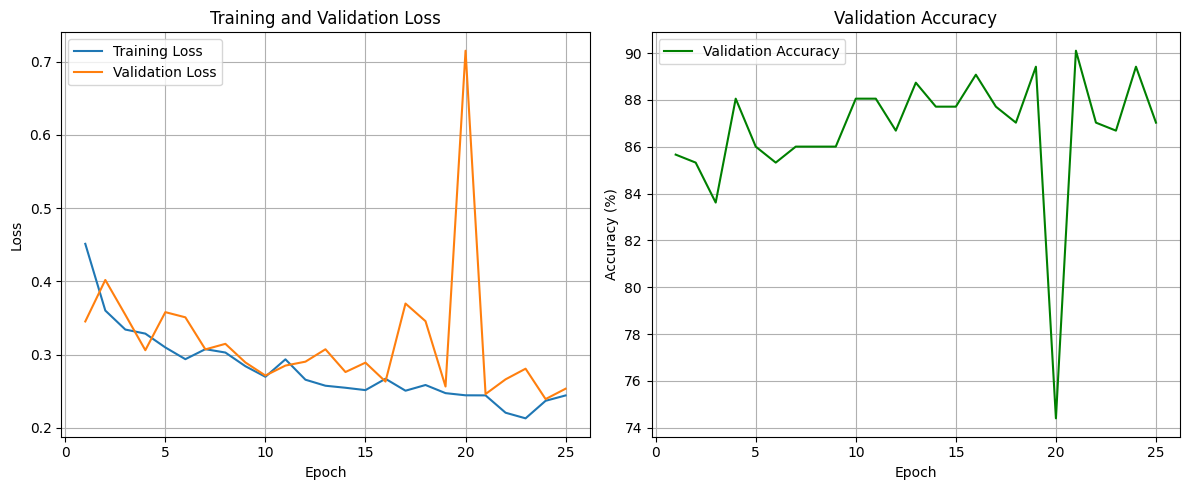

Learning curves displayed.


In [ ]:
# Step: Visualize Learning Curves
# Sub-step: Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Sub-step: Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Learning curves displayed.")

# Step13: Analyze Learning Curves and Model Fitting

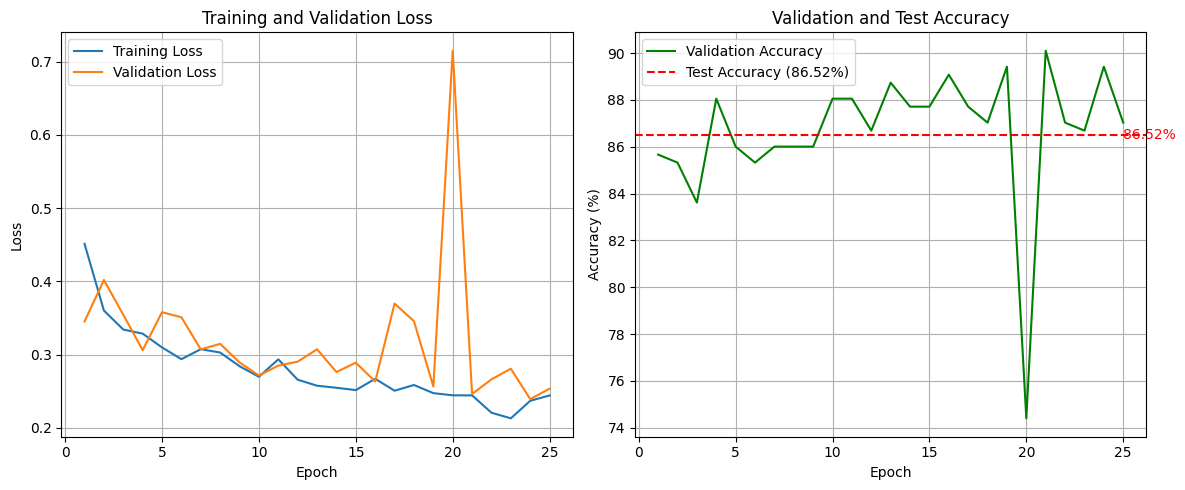


Analyzing Model Fitting based on Learning Curves:
- Losses are close: Indicates a potentially good fit or slight variance.
  - If validation accuracy is high, indicates a Good Fit.

Note: This is a basic interpretation. More detailed analysis might involve looking at the entire curve shape.


In [ ]:
# Step: Analyze Learning Curves and Model Fitting
# Sub-step: Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Sub-step: Plot validation and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
# Add a point for testing accuracy (assuming 'accuracy' variable from evaluation cell is available)
if 'accuracy' in locals():
    plt.axhline(y=accuracy, color='red', linestyle='--', label=f'Test Accuracy ({accuracy:.2f}%)')
    plt.text(num_epochs, accuracy, f'{accuracy:.2f}%', va='center', ha='left', color='red') # Add text label
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation and Test Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Sub-step: Interpret learning curves for model fitting
print("\nAnalyzing Model Fitting based on Learning Curves:")

# Criteria for interpretation (can be adjusted based on your model and dataset)
loss_diff_threshold = 0.1 # Threshold for difference between train and val loss
accuracy_diff_threshold = 5 # Threshold for difference between train and val accuracy (%)
min_val_accuracy = 80 # Minimum acceptable validation accuracy

# Simple interpretation logic
if val_losses[-1] < train_losses[-1] and abs(train_losses[-1] - val_losses[-1]) > loss_diff_threshold:
    print("- Potential Overfitting: Validation loss is significantly lower than training loss in the final epochs.")
elif train_losses[-1] < val_losses[-1] and abs(train_losses[-1] - val_losses[-1]) > loss_diff_threshold:
     print("- Potential Underfitting or Good Fit: Training loss is lower than validation loss. Check if both are converging and accuracy is high.")
     if val_accuracies[-1] < min_val_accuracy:
         print("  - Indicates potential Underfitting: Validation accuracy is low despite converging losses.")
     else:
         print("  - Indicates a generally Good Fit: Both losses are converging, and validation accuracy is reasonably high.")

elif abs(train_losses[-1] - val_losses[-1]) <= loss_diff_threshold:
    print("- Losses are close: Indicates a potentially good fit or slight variance.")
    if val_accuracies[-1] < min_val_accuracy:
        print("  - If validation accuracy is low, could indicate Underfitting.")
    else:
         print("  - If validation accuracy is high, indicates a Good Fit.")

# Check for divergence
if val_losses[-1] > val_losses[-2] and train_losses[-1] < train_losses[-2] and val_losses[-1] - train_losses[-1] > loss_diff_threshold:
    print("- Possible Overfitting: Validation loss is increasing while training loss is decreasing.")

# Consider accuracy trends as well
if val_accuracies[-1] < val_accuracies[-2] and train_losses[-1] < train_losses[-2]:
     print("- Possible Overfitting: Validation accuracy is decreasing or stagnating while training loss is still decreasing.")


print("\nNote: This is a basic interpretation. More detailed analysis might involve looking at the entire curve shape.")

# Step14: GradCAM Implementation

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


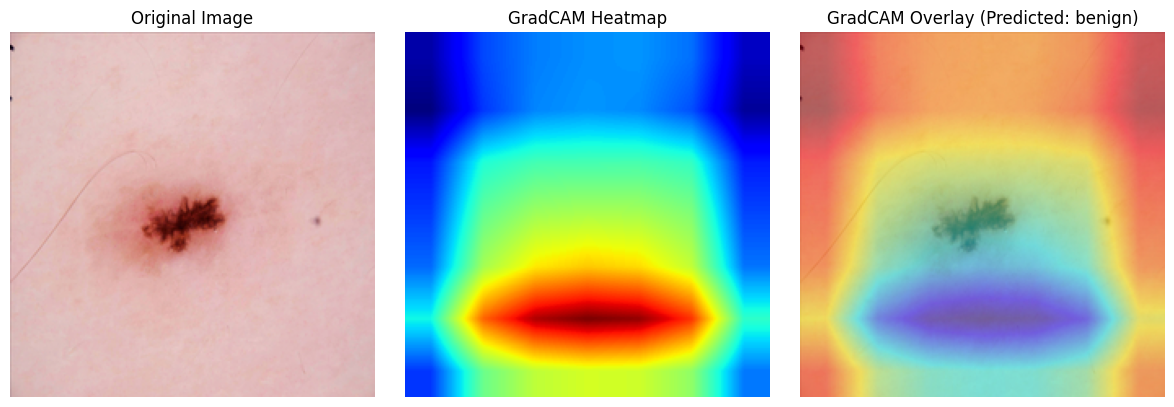

In [ ]:
# Step: GradCAM Implementation (Optional)
# Sub-step: Define a GradCAM class or function
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Register hooks to store gradients and activations
        self.target_layer.register_forward_hook(self._save_activation)
        self.target_layer.register_backward_hook(self._save_gradient)

    def _save_activation(self, module, input, output):
        self.activations = output

    def _save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def __call__(self, x, class_idx=None):
        # Ensure model is in evaluation mode
        self.model.eval()

        # Forward pass
        output = self.model(x)

        if class_idx is None:
            # Get the predicted class if not specified
            class_idx = torch.argmax(output).item()

        # Zero gradients
        self.model.zero_grad()

        # Backward pass to get gradients for the target class
        one_hot = torch.zeros_like(output).to(output.device)
        one_hot[0][class_idx] = 1
        output.backward(gradient=one_hot, retain_graph=True)

        # Get gradients and activations
        gradients = self.gradients.cpu().data.numpy()[0]
        activations = self.activations.cpu().data.numpy()[0]

        # Compute GradCAM
        weights = np.mean(gradients, axis=(1, 2))
        cam = np.sum(weights[:, np.newaxis, np.newaxis] * activations, axis=0)

        # Apply ReLU
        cam = np.maximum(cam, 0)
        cam = cv2.resize(cam, (x.shape[-2], x.shape[-1]))
        cam = (cam - cam.min()) / (cam.max() - cam.min()) # Normalize

        return cam

# Sub-step: Demonstrate GradCAM usage with a sample image
import cv2 # Import OpenCV for image processing

# Assuming you have a test image tensor 'sample_input_tensor' and its original image 'sample_original_image'
# You would get these from your test dataset or a single image file

# For demonstration, let's get a sample image from the test dataset
# Make sure test_dataset is defined and has images
if 'test_dataset' in locals() and len(test_dataset) > 0:
    # Get a sample image and label from the test dataset
    sample_img_tensor, sample_label = test_dataset[0] # Get a sample from the test set

    # Get the original image path (before transformations like normalization)
    # Need to handle both ImageFolder and Subset types
    try:
        if isinstance(test_dataset, ImageFolder):
            original_img_path, _ = test_dataset.imgs[0]
        elif isinstance(test_dataset, torch.utils.data.Subset):
             original_dataset = test_dataset.dataset  # Get the underlying dataset
             original_index = test_dataset.indices[0] # Get the index in the original dataset
             # Check if the underlying dataset is ImageFolder
             if isinstance(original_dataset, ImageFolder):
                 original_img_path, _ = original_dataset.imgs[original_index]
             else:
                 raise TypeError("Underlying dataset is not ImageFolder")
        else:
             raise TypeError("test_dataset is neither ImageFolder nor Subset")


        sample_original_image = Image.open(original_img_path).convert('RGB')
        # Resize the original image to match the input size of the model for overlay
        preprocess = transforms.Compose([transforms.Resize((224, 224))]) # Assuming model input size is 224x224
        sample_original_image_resized = preprocess(sample_original_image)
        sample_original_image_np = np.array(sample_original_image_resized)
    except Exception as e:
        print(f"Could not load original image for GradCAM visualization: {e}")
        sample_original_image_np = None # Set to None if loading fails


    # Move the sample tensor to the device
    sample_input_tensor = sample_img_tensor.unsqueeze(0).to(device) # Add batch dimension and move to device

    # Get the target layer for GradCAM (usually the last convolutional layer)
    # For ResNet18, layer4[-1] is a good candidate
    target_layer = model.layer4[-1]

    # Create a GradCAM instance
    grad_cam = GradCAM(model, target_layer)

    # Get the predicted class for the sample image
    with torch.no_grad():
        output = model(sample_input_tensor)
        predicted_class_idx = torch.argmax(output).item()
        predicted_class_name = classes[predicted_class_idx]

    # Generate GradCAM heatmap
    cam = grad_cam(sample_input_tensor, predicted_class_idx)

    # Overlay GradCAM heatmap on the original image
    if sample_original_image_np is not None:
        heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
        # Resize heatmap to match the original image size for overlay
        heatmap_resized = cv2.resize(heatmap, (sample_original_image_np.shape[1], sample_original_image_np.shape[0]))
        # Ensure heatmap is float before blending
        heatmap_resized = np.float32(heatmap_resized) / 255
        sample_original_image_np = np.float32(sample_original_image_np) / 255

        # Blend the heatmap and the original image
        alpha = 0.5 # Transparency factor
        cam_on_image = cv2.addWeighted(sample_original_image_np, alpha, heatmap_resized, 1 - alpha, 0)

        # Display the original image, heatmap, and GradCAM on image
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(sample_original_image_resized) # Display resized original image
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(cam, cmap='jet')
        plt.title("GradCAM Heatmap")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cam_on_image)
        plt.title(f"GradCAM Overlay (Predicted: {predicted_class_name})")
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Skipping GradCAM visualization due to issue loading original image.")

else:
    print("Test dataset not found or is empty. Cannot perform GradCAM visualization.")

In [ ]:
!pip install gradio

In [ ]:
# Step: Deployment with Gradio - Optimized Inference
import gradio as gr
from PIL import Image
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
import os
import time # Import time to measure inference speed
import threading # Import threading for stopping the Gradio interface

# Define the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define paths to the dataset directories (needed for calculating mean/std)
# Corrected path based on directory listing output
train_data_root = '/content/drive/MyDrive/cancer_extracted/data/train'
test_data_root = '/content/drive/MyDrive/cancer_extracted/data/test' # Although not strictly needed for inference, keeping for context

# Define class labels
classes = ['benign', 'malignant']

# Calculate mean and std for normalization (if not already available)
# This is done once when the script starts
train_mean = None
train_std = None

# Load a temporary dataset without normalization to calculate mean and std
transform_calculate_mean_std = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

if not os.path.exists(train_data_root):
    print(f"Error: Training data directory not found at {train_data_root}. Cannot calculate mean/std.")
    # Set default values if directory is not found
    train_mean = [0.5, 0.5, 0.5]
    train_std = [0.5, 0.5, 0.5]
else:
    try:
        train_dataset_temp = ImageFolder(root=train_data_root, transform=transform_calculate_mean_std)
        print("Calculating mean and std from training data...")
        loader_temp = torch.utils.data.DataLoader(train_dataset_temp, batch_size=32, shuffle=False, num_workers=2)
        mean = 0.
        std = 0.
        nb_samples = 0.
        for data, _ in loader_temp:
            batch_samples = data.size(0)
            data = data.view(batch_samples, data.size(1), -1)
            mean += data.mean(2).sum(0)
            std += data.std(2).sum(0)
            nb_samples += batch_samples

        train_mean = mean / nb_samples
        train_std = std / nb_samples
        print(f"Calculated Mean: {train_mean}")
        print(f"Calculated Std: {train_std}")
    except Exception as e:
        print(f"An error occurred while calculating mean/std: {e}")
        # Fallback to default values in case of error
        train_mean = [0.5, 0.5, 0.5]
        train_std = [0.5, 0.5, 0.5]
        print("Using default mean and std values.")


# Load the trained model once when the script starts
model_deploy = None
model_save_path = "/content/drive/MyDrive/best_cancer_model.pth"

# First, define the model architecture (same as during training)
model_deploy = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
num_ftrs_deploy = model_deploy.fc.in_features
model_deploy.fc = nn.Linear(num_ftrs_deploy, 2) # Output layer with 2 classes

if os.path.exists(model_save_path):
    try:
        # Load the saved state dictionary
        model_deploy.load_state_dict(torch.load(model_save_path, map_location=device))
        model_deploy = model_deploy.to(device)
        model_deploy.eval() # Set model to evaluation mode
        print(f"Model loaded successfully from {model_save_path}")
    except Exception as e:
        print(f"An error occurred while loading the model from {model_save_path}: {e}")
        # Handle the error - the Gradio interface will not work without the model
        model_deploy = None # Set model_deploy to None to indicate loading failed
else:
    print(f"Error: Model file not found at {model_save_path}. Please ensure the model training and saving steps were completed successfully.")
    model_deploy = None # Set model_deploy to None to indicate loading failed


# Define the prediction function for Gradio
def predict_image(image):
    if model_deploy is None:
        return "Error: Model not loaded.", None # Return an error if model loading failed

    start_time = time.time() # Start timing

    # Gradio's gr.Image(type="numpy") provides the image as a numpy array
    # Convert numpy array to PIL Image
    try:
        image_pil = Image.fromarray(image.astype('uint8'), 'RGB')
    except Exception as e:
        return f"Error converting image to PIL: {e}", None


    # Apply the same transformations as the test set (excluding augmentation)
    # Use the calculated train_mean and train_std
    try:
        transform_test_deploy = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=train_mean, std=train_std) # Use training mean/std
        ])
        image_tensor = transform_test_deploy(image_pil).unsqueeze(0).to(device) # Add batch dimension and move to device
    except Exception as e:
        return f"Error during image transformation: {e}", None

    # Perform inference
    with torch.no_grad():
        outputs = model_deploy(image_tensor)
        probabilities = torch.softmax(outputs, dim=1)[0] # Get probabilities

    end_time = time.time() # End timing
    inference_time = end_time - start_time
    print(f"Inference time: {inference_time:.4f} seconds")

    # Determine severity level and recommendations based on predictions
    predicted_class_idx = torch.argmax(outputs).item()
    predicted_class_name = classes[predicted_class_idx]
    confidence = probabilities[predicted_class_idx].item()

    severity = "Low"
    recommendation = "Monitor the lesion for changes. Regular self-examinations are recommended."
    color = "green" # Default color for low severity

    if predicted_class_name == 'malignant':
        if confidence > 0.85: # Higher confidence threshold for high severity
            severity = "High"
            recommendation = "Urgent consultation with a dermatologist is strongly advised. Further diagnostic tests, such as a biopsy, may be necessary for confirmation and treatment planning."
            color = "red" # Color for high severity
        elif confidence > 0.6: # Medium confidence threshold
            severity = "Medium"
            recommendation = "Consult a dermatologist for a thorough clinical examination and professional assessment. Digital dermoscopy or other imaging techniques may be used. Follow-up or biopsy may be recommended."
            color = "orange" # Color for medium severity
        else: # Lower confidence for malignant prediction
             severity = "Low to Medium"
             recommendation = "Consult a healthcare professional or dermatologist for further evaluation and monitoring. While the confidence is not high, a professional opinion is important."
             color = "yellow" # Color for low to medium severity
    else: # Predicted as benign
        if confidence < 0.6: # Low confidence for benign, could still be concerning
             severity = "Low to Medium"
             recommendation = "Consult a healthcare professional or dermatologist for further evaluation and monitoring. While the prediction is benign, the confidence is not very high."
             color = "yellow"
        # If confidence is high for benign, the initial recommendation is sufficient

    results = {classes[i]: probabilities[i].item() for i in range(len(classes))}

    # Combine results, severity, and recommendation with color for severity
    output_text = f"<b>Prediction:</b> {predicted_class_name.capitalize()} (Confidence: {confidence:.2f})<br>"
    output_text += f"<b>Severity:</b> <span style='color:{color};'><b>{severity}</b></span><br>"
    output_text += f"<b>Recommendation:</b> {recommendation}"


    return output_text, results


# Sub-step: Create the Gradio interface
# Define input and output components
image_input = gr.Image(type="numpy", label="Upload Skin Lesion Image")
# Use 'label' output for classification probabilities
# Removed render=False as it's not a valid parameter for gr.Textbox
output_text = gr.Textbox(label="Analysis Results")
output_html = gr.HTML() # Use HTML component for colored text

output_label = gr.Label(num_top_classes=2, label="Class Probabilities")


# Create the interface
iface = gr.Interface(
    fn=predict_image,
    inputs=image_input,
    outputs=[output_html, output_label], # Use HTML output and Label output
    title="Skin Lesion Classification",
    description="Upload an image of a skin lesion to get a prediction (Benign or Malignant), severity level, and recommendation.",
    allow_flagging="never" # Disable flagging
)

# Sub-step: Launch the interface
# Set share=True to create a public link (useful for Colab)
try:
    # Use a separate thread to launch Gradio and stop it after a delay
    # Removed the threading and time.sleep to allow Gradio to run indefinitely in Colab
    # The user can manually stop the cell execution to stop the Gradio interface
    iface.launch(debug=True, share=True, inline=True) # Added inline=True
    print("Gradio interface launched.")

except Exception as e:
    print(f"Error launching Gradio interface: {e}")
    print("Please ensure you have installed Gradio: !pip install gradio")
    # You might want to re-raise the exception or exit here

Using device: cpu
Calculating mean and std from training data...
Calculated Mean: tensor([0.7602, 0.5367, 0.5379])
Calculated Std: tensor([0.0951, 0.1191, 0.1330])
Model loaded successfully from /content/drive/MyDrive/best_cancer_model.pth


/usr/local/lib/python3.12/dist-packages/gradio/interface.py:425: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ceece64222f8028c14.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/tmp/ipython-input-1413963709.py:105: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image_pil = Image.fromarray(image.astype('uint8'), 'RGB')


Inference time: 0.4462 seconds


/tmp/ipython-input-1413963709.py:105: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image_pil = Image.fromarray(image.astype('uint8'), 'RGB')


Inference time: 0.1121 seconds


/tmp/ipython-input-1413963709.py:105: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image_pil = Image.fromarray(image.astype('uint8'), 'RGB')


Inference time: 0.1708 seconds


/tmp/ipython-input-1413963709.py:105: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image_pil = Image.fromarray(image.astype('uint8'), 'RGB')


Inference time: 0.1163 seconds
